## Logistic Regression with ROC curve and AUC Score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
## generate 2 class datasets
X,y =make_classification(n_samples=1000,n_classes=2,random_state=1)

In [4]:
data = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

In [5]:
data["Target"]=y

In [6]:
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Target
0,-2.045822,-0.137916,-0.080714,2.522038,0.746165,-0.906964,-0.221648,1.014267,-0.541549,0.226619,...,1.374085,1.009053,0.674110,1.534583,0.479711,-0.912911,2.481945,0.742367,0.231548,0
1,-0.987260,1.301202,2.377349,0.553914,0.752270,0.064656,0.018317,-1.043610,-0.004103,0.532759,...,1.203994,-0.379959,0.656015,0.666794,-0.776604,0.260800,0.554458,-0.218921,-0.376086,0
2,0.573359,0.093756,0.466252,-1.370757,0.010039,0.682971,2.113365,0.626686,1.492389,0.899646,...,2.397674,-1.150714,-0.550760,-0.503923,-1.007000,0.530524,-0.608851,0.799035,-0.171212,0
3,-0.957644,-1.198484,0.551434,1.677175,0.771950,0.594277,0.642587,0.343373,-0.159067,0.756203,...,0.487858,1.121529,0.078711,0.773569,0.124356,-0.002483,-0.078416,-0.220112,0.211440,1
4,-0.963790,-1.544768,-1.287670,1.577101,-1.154661,-1.305605,-1.503319,0.928823,1.919975,-1.610496,...,0.624567,0.983836,-1.257569,0.766206,0.664644,0.909121,-2.526710,-0.161161,0.759508,1


In [7]:
## split the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [22]:
X_test.shape,y_test.shape


((200, 20), (200,))

In [9]:
## Created a dummy model with default 0 as output
dummy_model_prob = [0 for i in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
model_prob=model.predict_proba(X_test)
model_prob

array([[4.91700475e-02, 9.50829952e-01],
       [9.50424425e-01, 4.95755747e-02],
       [6.64124469e-02, 9.33587553e-01],
       [7.45595863e-01, 2.54404137e-01],
       [9.74421134e-01, 2.55788658e-02],
       [1.33368615e-01, 8.66631385e-01],
       [9.40545985e-01, 5.94540148e-02],
       [2.37746743e-01, 7.62253257e-01],
       [3.20456860e-01, 6.79543140e-01],
       [5.38536436e-02, 9.46146356e-01],
       [9.74197903e-01, 2.58020974e-02],
       [1.09192745e-02, 9.89080726e-01],
       [9.68028960e-01, 3.19710401e-02],
       [9.94281579e-01, 5.71842111e-03],
       [9.66118349e-02, 9.03388165e-01],
       [6.29696294e-01, 3.70303706e-01],
       [1.09782019e-01, 8.90217981e-01],
       [2.64257348e-01, 7.35742652e-01],
       [5.97397682e-01, 4.02602318e-01],
       [2.75993287e-01, 7.24006713e-01],
       [4.92338949e-01, 5.07661051e-01],
       [1.78332060e-01, 8.21667940e-01],
       [7.91116543e-01, 2.08883457e-01],
       [3.31168135e-01, 6.68831865e-01],
       [5.211080

In [12]:
## Lets focus on the possitive outcomes
model_prob=model_prob[:,1]
model_prob

array([0.95082995, 0.04957557, 0.93358755, 0.25440414, 0.02557887,
       0.86663138, 0.05945401, 0.76225326, 0.67954314, 0.94614636,
       0.0258021 , 0.98908073, 0.03197104, 0.00571842, 0.90338817,
       0.37030371, 0.89021798, 0.73574265, 0.40260232, 0.72400671,
       0.50766105, 0.82166794, 0.20888346, 0.66883186, 0.47889195,
       0.03670814, 0.00390723, 0.9855201 , 0.8627686 , 0.04726152,
       0.93066004, 0.83469893, 0.05268148, 0.7345329 , 0.00236061,
       0.26140108, 0.11528614, 0.41924381, 0.85873931, 0.71817667,
       0.19873421, 0.07085622, 0.43805241, 0.03704811, 0.03854201,
       0.49340886, 0.73255379, 0.0190436 , 0.68870903, 0.00997369,
       0.99456186, 0.80257698, 0.97269649, 0.81649287, 0.99915749,
       0.89539784, 0.05432675, 0.98704477, 0.98720665, 0.04648523,
       0.09189708, 0.51592724, 0.99432257, 0.05263067, 0.96236623,
       0.29053111, 0.06356231, 0.99753409, 0.01802031, 0.97795458,
       0.06932967, 0.00891019, 0.15615418, 0.43553049, 0.88289

In [13]:
## Lets calculate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.909273384183059


In [14]:
## calculate ROC Curves
dummy_fpr,dummy_tpr,_= roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds =roc_curve(y_test,model_prob)

In [15]:
thresholds

array([       inf, 0.99915749, 0.98720665, 0.98704477, 0.9855201 ,
       0.9834888 , 0.96614427, 0.96574809, 0.937903  , 0.93765143,
       0.93358755, 0.93066004, 0.88289329, 0.88181204, 0.83246321,
       0.82166794, 0.78849966, 0.78664669, 0.77319869, 0.7720581 ,
       0.76225326, 0.73611214, 0.72400671, 0.71817667, 0.71019914,
       0.70915979, 0.68870903, 0.66977503, 0.66883186, 0.66882836,
       0.57706442, 0.56557324, 0.53691899, 0.48590104, 0.47889195,
       0.46179453, 0.45183412, 0.43805241, 0.41924381, 0.41101796,
       0.40260232, 0.37030371, 0.33999931, 0.15813081, 0.15615418,
       0.00236061, 0.00219575, 0.00124742])

In [16]:
dummy_fpr,dummy_tpr

(array([0., 1.]), array([0., 1.]))

In [17]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , 0.00943396, 0.00943396,
        0.02830189, 0.02830189, 0.03773585, 0.03773585, 0.04716981,
        0.04716981, 0.05660377, 0.05660377, 0.06603774, 0.06603774,
        0.0754717 , 0.0754717 , 0.08490566, 0.08490566, 0.09433962,
        0.09433962, 0.10377358, 0.10377358, 0.11320755, 0.11320755,
        0.12264151, 0.12264151, 0.14150943, 0.14150943, 0.1509434 ,
        0.1509434 , 0.16037736, 0.16037736, 0.20754717, 0.20754717,
        0.22641509, 0.22641509, 0.24528302, 0.24528302, 0.25471698,
        0.25471698, 0.27358491, 0.27358491, 0.44339623, 0.44339623,
        0.99056604, 0.99056604, 1.        ]),
 array([0.        , 0.0106383 , 0.15957447, 0.15957447, 0.17021277,
        0.17021277, 0.25531915, 0.25531915, 0.35106383, 0.35106383,
        0.36170213, 0.36170213, 0.46808511, 0.46808511, 0.59574468,
        0.59574468, 0.67021277, 0.67021277, 0.69148936, 0.69148936,
        0.70212766, 0.70212766, 0.75531915, 0.75531915, 0.76595745,
  

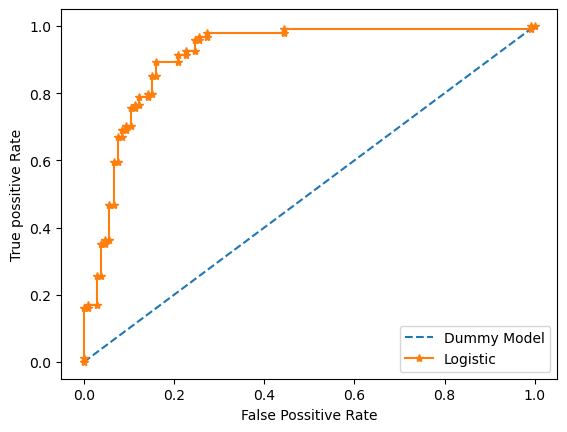

In [18]:
## plot the roc curve for the model
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--', label="Dummy Model")
pyplot.plot(model_fpr,model_tpr,marker='*',label='Logistic')
pyplot.xlabel('False Possitive Rate')
pyplot.ylabel('True possitive Rate')
pyplot.legend(loc="best")
pyplot.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


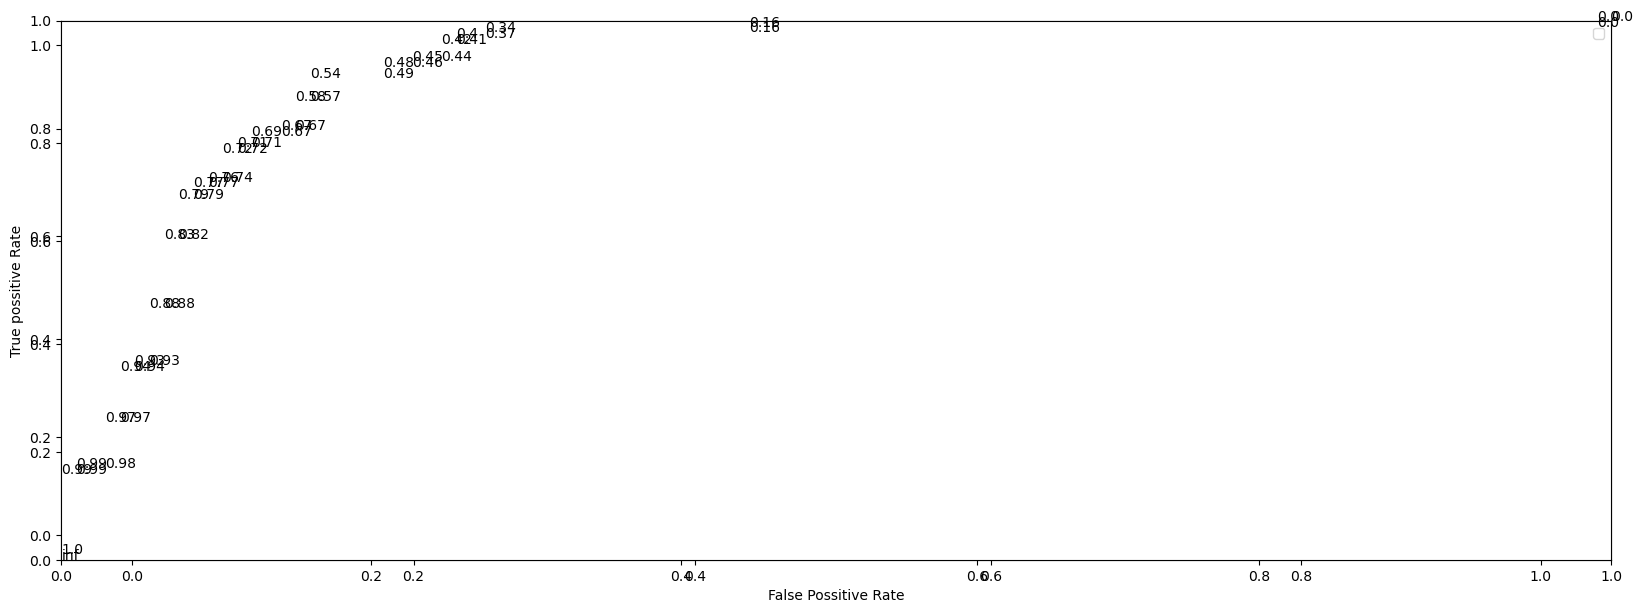

In [27]:
## plot the roc curve for the model
import numpy as numpy
fig=pyplot.figure(figsize=(20,7))
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy Model")
pyplot.plot(model_fpr,model_tpr,marker='*',label='Logistic')
ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s'% np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
pyplot.xlabel('False Possitive Rate')
pyplot.ylabel('True possitive Rate')
pyplot.legend()

pyplot.show()